In [ ]:
# Se importan todas las librerías a utilizar.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
#leer carpetas
import os

# Base de datos

In [ ]:
# folder path
dir_fold = 'C:/Users/carlo/OneDrive - Universidad Nacional de Colombia/Semestre 11/MachineLearning/DownScaling/VariablesListas'

# list to store Folders
folder = []

# Iterate directory
for path in os.listdir(dir_fold):
    # check if current path is a file
    #if os.path.isfile(os.path.join(dir_path, path)):
        folder.append(path)

orden = [3,2,6,5,1,0,4]

df = pd.DataFrame()

for i in orden:
    df_i = pd.read_csv(dir_fold+'/'+folder[i])
    df = pd.concat([df, df_i], axis=1)

X = df.drop(['Ppt_SIATA'], axis=1)
y = df['Ppt_SIATA']

df.head(2)

,Ppt_ERA5,Humedad,Temperatura,Presion,Elevación,CoorX,CoorY,Ppt_SIATA
0,5.47598,33.672039,13.844298,802.956631,1781.0,-75.28,6.55,43.023724
1,5.47598,33.672039,14.142333,803.052634,1624.0,-75.27,6.55,38.443913


## SVM para Regresión (SVR)

## Separación en entrenamiento y validación

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(X, y, test_size=0.95)

El SVM con problemas de regresión funciona similar. En este caso se contruye una base de datos con una función real tipo seno.

In [ ]:
from sklearn.svm import SVR
svr = SVR()
svr_lin = SVR(kernel="poly", C=1000)
svr_rbf = SVR(kernel="rbf", C=1000)
y_lin = svr_lin.fit(x_train,y_train).predict(x_train)
y_rbf = svr_rbf.fit(x_train,y_train).predict(x_train)

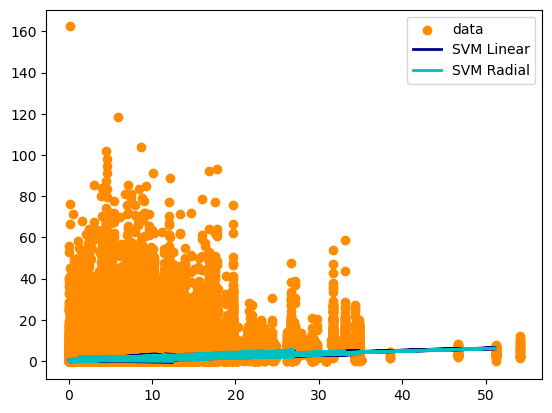

In [ ]:
plt.scatter(X[keysX[0]],y, color="darkorange", label="data")
plt.plot(x_train[keysX[0]],y_lin, color="navy", lw = 2, label = "SVM Linear")
plt.plot(x_train[keysX[0]],y_rbf, color="c", lw=2, label="SVM Radial")
# plt.gca().set_aspect('equal')
plt.legend();

Los resultados con *cross validation* para la solución lineal es:

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=5, random_state=1, shuffle = True)
results = cross_val_score(svr_lin, x_train, y_train, cv=kfold)
print(results.mean())
print(results.std())

-0.07534923154883702
0.010451035691547825


Los resultados con *cross validation* para la solución no lineal es:

In [ ]:
results = cross_val_score(svr_rbf, x_train, y_train, cv=kfold)
print(results.mean())
print(results.std())

-0.07703528989735475
0.012488886685395776
